## Implementação de um Classificador Perceptron

In [185]:
import numpy as np


class Perceptron1(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [352]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron1(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implemente uma função para calcular a acurácia do modelo

## Questao 2 - Implemente um método de validação cruzada para testar 

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [188]:
df = sns.load_dataset('iris')

In [189]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [191]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [192]:
from sklearn.preprocessing import LabelEncoder

In [365]:
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values

In [366]:
le = LabelEncoder()

Y = le.fit_transform(Y)

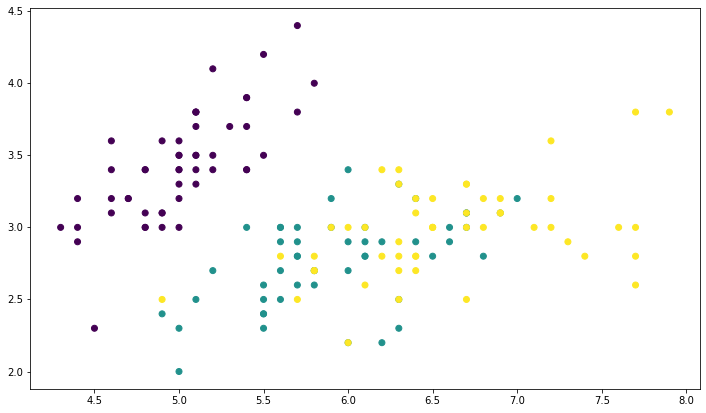

In [367]:
plt.figure(figsize=(12,7))
plt.scatter('sepal_length','sepal_width',data=df,c=Y)

In [368]:
le.transform(['setosa','versicolor','virginica'])

array([0, 1, 2])

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [370]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [309]:
sc = StandardScaler()

In [310]:
sc.fit(x_train)


StandardScaler()

In [311]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

### Treinando o Modelo

In [340]:
ppn = Perceptron1(eta=0.1, n_iter=70000, random_state=1)

In [360]:
perceptron.fit(x_train,y_train)

In [361]:
data = perceptron.predict(x_test_sc)

In [362]:
data

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1])

In [358]:
y_test

array([2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 1, 0, 0, 1])